# Xarxes Neuronals

*Font: http://blog.kaggle.com/2017/11/27/introduction-to-neural-networks/*

Here we have a collection of grayscale images, each a 2×2 grid of pixels where each pixel has an intensity value between 0 (white) and 255 (black). The goal is to build a model that identifies images with a “stairs” pattern.

![Dades](figures/fig1.png)

For each image, we label the pixels $x_1, x_2, x_3, x_4$ and generate an input vector $\mathbf{x} = \begin{bmatrix}x_1, & x_2, & x_3, & x_4\end{bmatrix}$ which will be the input to our model. We expect our model to predict ``True`` (the image has the stairs pattern) or ``False`` (the image does not have the stairs pattern).


![Dades](figures/fig2.png)

| ImageId | x1 | x2 | x3 | x4 | IsStairs | 
| ------- | -- | -- | -- | -- | -------- | 
| 1	      | 252| 4	| 155| 175| TRUE | 
| 2	      | 175| 10	| 186| 200| TRUE | 
| 3	      | 82 | 131| 230| 100| FALSE| 
| …	      | …  | …	| …	 | …  | … | 
| 498	  | 36 | 187| 43 | 249| FALSE | 
| 499	  | 1  | 160| 169| 242| TRUE | 
| 500	  | 198| 134| 22 | 188| FALSE | 


## Perceptron

A simple model we could build is a single layer **perceptron**. 

A perceptron uses a weighted linear combination of the inputs to return a prediction score. If the prediction score exceeds a selected threshold, the perceptron predicts ``True``. Otherwise it predicts ``False``. More formally,

$$f(x)={\begin{cases} 1 &{\text{if }}\ w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 > threshold\\ 0 & {\text{otherwise}} \end{cases}} $$

Let’s re-express this as follows

$$\widehat y = \mathbf w \cdot \mathbf x + b $$

$$f(x)={\begin{cases} 1 &{\text{if }}\ \widehat{y} > 0\\ 0 & {\text{otherwise}} \end{cases}} $$

Here $\widehat{y}$ is our prediction score.

![Dades](figures/fig3.png)


For our example, suppose we build the following perceptron:

$$\widehat{y} = -0.0019x_1 + -0.0016x_2 + 0.0020x_3 + 0.0023x_4 + 0.0003 $$

Here’s how the perceptron would perform on some of our training images.

![Dades](figures/fig4.png)

This would certainly be better than randomly guessing and it makes some logical sense. All the stairs patterns have darkly shaded pixels in the bottom row which supports the larger, positive coefficients for $x_3$ and $x_4$. Nonetheless, there are some glaring problems with this model.

The model outputs a real number whose value correlates with the concept of likelihood (higher values imply a greater probability the image represents stairs) but **there’s no basis to interpret the values as probabilities**, especially since they can be outside the range $[0, 1]$.

The model can’t capture the non-linear relationship between the variables and the target. To see this, consider the following hypothetical scenarios:

###  Case A

Start with an image, $x = [100, 0, 0, 125]$. Increase $x_3$ from 0 to 60.

![Dades](figures/fig5.png)

###  Case B

Start with the last image, $x = [100, 0, 60, 125]$. Increase $x_3$ from 60 to 120.

![Dades](figures/fig6.png)

Intuitively, ``Case A`` should have a much larger increase in $\widehat y$ than ``Case B``. However, since our perceptron model is a linear equation, the equivalent +60 change in $x_3$ resulted in an equivalent +0.12 change in $\widehat y$ for both cases.

There are more issues with our linear perception, but let’s start by addressing these two.

## Single Layer Perceptron with Sigmoid activation function.

We can fix problems 1 and 2 above by wrapping our perceptron within a **sigmoid function** (and subsequently choosing different weights). 

Recall that the sigmoid function is an S shaped curve bounded on the vertical axis between 0 and 1, and is thus frequently used to model the probability of a binary event.

![Dades](figures/fig7.png)

$$sigmoid(z) = \frac{1}{1 + e^{-z}} $$

Following this idea, we can update our model with the following picture and equation.

![Dades](figures/fig8.png)

$$z = \mathbf w \cdot \mathbf x + b = w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + b $$

$$\widehat y = sigmoid(z) = \frac{1}{1 + e^{-z}} $$

> We can simplify notation by *absorving* $b$ in $\mathbf w$. This can be done by extending all examples with an extra dimension with value 1: $x = [100, 0, 0, 125] \rightarrow x = [100, 0, 0, 125, 1]$. Then, $\mathbf w$ will have an extra dimensional and its last value will represent $b$.

Since we now interpret $\widehat y$ as a probability, we must update our decision rule accordingly.

$$f(x)={\begin{cases} 1 &{\text{if }}\ \widehat{y} > 0.5\\ 0 & {\text{otherwise}} \end{cases}} $$

Continuing with our example problem, suppose we come up with the following fitted model:

$$\begin{bmatrix} w_1 & w_2 & w_3 & w_4 \end{bmatrix} = \begin{bmatrix} -0.140 & -0.145 & 0.121 & 0.092 \end{bmatrix} $$

$$b = -0.008 $$

$$\widehat y = \frac{1}{1 + e^{-(-0.140x_1 -0.145x_2 + 0.121x_3 + 0.092x_4 -0.008)}} $$

Observe how this model performs on the same sample images from the previous section.

![Dades](figures/fig9.png)

Clearly this fixes problem 1 from above. Observe how it also fixes problem 2.

### Case A
Start with an image, $x = [100, 0, 0, 125]$. Increase $x_3$ from 0 to 60.

![Dades](figures/fig10.png)

### Case B
Start with the last image, $x = [100, 0, 60, 125]$. Increase $x_3$ from 60 to 120.

![Dades](figures/fig11.png)

Notice how the curvature of the sigmoid function causes ``Case A`` to “fire” (increase rapidly) as $z = \mathbf w \cdot \mathbf x$ increases, but the pace slows down as $z$ continues to increase. This aligns with our intuition that ``Case A`` should reflect a greater increase in the likelihood of stairs versus ``Case B```.

![Dades](figures/fig12.png)

Unfortunately this model still has issues.

+ $\widehat y$ has a monotonic relationship with each variable. What if we want to identify lightly shaded stairs?

+ The model does not account for variable interaction. Assume the bottom row of an image is black. If the top left pixel is white, darkening the top right pixel should increase the probability of stairs. If the top left pixel is black, darkening the top right pixel should decrease the probability of stairs. In other words, increasing $x_3$ should potentially increase or decrease $\widehat y$ depending on the values of the other variables. Our current model has no way of achieving this.

> We cannot solve the XOR problem with a perceptron.

In [1]:
import numpy as np

x = np.array([(47, 250, 8, 88, 1),
     (175, 10, 186, 200, 1),
     (82, 131, 230, 100, 1),
     (36, 187, 43, 249, 1),
     (1,160,169, 242, 1),
     (198, 134, 22, 188, 1)])

y = np.array([0,1,0,0,1,0])

def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def logistic(x,w):
    return np.dot(x,w)

def classifier(x,w):
    return sigmoid(logistic(x,w))

w = np.array([-0.140, -0.145, 0.121, 0.092, -0.008])

print(classifier(x[0],w))
print(classifier(x[1],w))

2.1485139023e-15
0.99999967777


## Multi-Layer Perceptron with Sigmoid activation function

We can solve both of the above issues by **adding an extra layer** to our perceptron model. 

We’ll construct a number of base models like the one above, but then we’ll feed the output of each base model as input into another perceptron. This model is in fact a **vanilla neural network**. 

Let’s see how it might work on some examples.

#### Example 1: Identify the stairs pattern

+ Build a model that fires when “left stairs” are identified, $\widehat y_{left}$
+ Build a model that fires when “right stairs” are identified, $\widehat y_{right}$
+ Add the score of the base models so that the final sigmoid function only fires if both $\widehat y_{left}$ and $\widehat y_{right}$ are large.

![Dades](figures/fig13.png)
![Dades](figures/fig14.png)

Alternatively

+ Build a model that fires when the bottom row is dark, $\widehat y_1$
+ Build a model that fires when the top left pixel is dark and the top right pixel is light, $\widehat y_2$
+ Build a model that fires when the top left pixel is light and the top right pixel is dark, $\widehat y_3$
+ Add the base models so that the final sigmoid function only fires if $\widehat y_1$ and $\widehat y_2$ are large, or $\widehat y_1$ and $\widehat y_3$ are large. (Note that $\widehat y_2$ and $\widehat y_3$ cannot both be large)

![Dades](figures/fig15.png)
![Dades](figures/fig16.png)


#### Example 2: Identify lightly shaded stairs

+ Build models that fire for “shaded bottom row”, “shaded x1 and white x2”, “shaded x2 and white x1”, $\widehat y_1$, $\widehat y_2$, and $\widehat y_3$
+ Build models that fire for “dark bottom row”, “dark x1 and white x2”, “dark x2 and white x1”, $\widehat y_4$, $\widehat y_5$, and $\widehat y_6$
+ Combine the models so that the “dark” identifiers are essentially subtracted from the “shaded” identifiers before squashing the result with a sigmoid function.

![Dades](figures/fig17.png)
![Dades](figures/fig18.png)

A single-layer perceptron has a single output layer. Consequently, the models we just built would be called **two-layer perceptrons** because they have an output layer which is the input to another output layer. However, we could call these same models neural networks, and in this respect the networks have three layers – an input layer, a hidden layer, and an output layer.

![Dades](figures/fig19.png)

## Alternative activation functions

In our examples we used a sigmoid activation function. However, we could use other activation functions. ``tanh`` and ``relu`` are common choices.

WARNING: The activation function **must be non-linear**, otherwise the neural network would simplify to an equivalent single layer perceptron.

In [2]:
def relu(x):
    return max(0,x)

print(relu(-3.0), relu(4))

0 4


## Multiclass classification

We can easily extend our model to work for multiclass classification by using multiple nodes in the final output layer. 

The idea here is that each output node corresponds to one of the $C$ classes we are trying to predict. Instead of squashing the output with the sigmoid function which maps an element in $\mathbb{R}$ to and element in $[0, 1]$, we can use the **softmax function** which maps a vector in $\mathbb{R}^n$ to a vector in $\mathbb{R}^n$ such that the resulting vector elements sum to 1. 

$$ \mbox{softmax}(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$$

In other words, we can design the network such that it outputs the vector $[prob(class_1), prob(class_2), …, prob(class_C)]$.

![Dades](figures/fig20.png)

## Using more than two layers (Deep Learning)

You might be wondering, “Can we extend our vanilla neural network so that its output layer is fed into a 4th layer (and then a 5th, and 6th, etc.)?”. 

Yes. This is what’s commonly referred to as **"deep learning”**. 

In practice it can be very effective. However, it’s worth noting that any network you build with more than one hidden layer can be mimicked by a network with only one hidden layer. In fact, **you can approximate any continuous function using a neural network with a single hidden layer as per the Universal Approximation Theorem**. 

The reasons deep neural network architectures are chosen in favor of single hidden layer architectures are:
+ they converge to a solution during the fitting procedure much more often and much more faster.
+ they use less parameters.

![Dades](figures/fig21.png)

## Fitting the model to labeled training samples (Backpropagation)

Alas we come to the fitting procedure. 

So far we’ve discussed how neural networks could work effectively, but we haven’t discussed how to fit a neural network to labeled training samples. 

An equivalent question would be, **“How can we choose the best weights for a network, given some labeled training samples?”**. 

**Gradient descent** is the common answer. 

Continuing with our example problem, the gradient descent procedure would go something like this:

+ Start with some labeled training data
+ Choose a differentiable loss function to minimize, $L(\mathbf{\widehat Y}, \mathbf{Y})$
+ Choose a network structure. Specifically detemine how many layers and how many nodes in each layer.
+ Initialize the network’s weights randomly
+ Run the training data through the network to generate a prediction for each sample. Measure the overall error according to the loss function, $L(\mathbf{\widehat Y}, \mathbf{Y})$. (This is called forward propagation)
+ Determine how much the current loss will change with respect to a small change in each of the weights. In other words, calculate the gradient of $L$ with respect to every weight in the network. (This is called backward propagation)
+ Take a small “step” in the direction of the negative gradient. For example, if $w_{23} = 1.5$ and $\frac{\partial L}{\partial w_{23}} = 2.2$, then decreasing $w_{23}$ by a small amount should result in a small decrease in the current loss. Hence we update $w_3 := w_3 - 2.2 \times 0.001$ (where $0.001$ is our predetermined “step size”).
+ Repeat this process (from step 5) a fixed number of times or until the loss converges.

That’s the basic idea at least. In practice, this poses a number of challenges.

## Example

We will use the following loss function (**binary cross-entropy**):

$$ L(\mathbf{Y}, \mathbf{\widehat Y}) = - \frac{1}{n} \sum_{i=1}^n 
 y_i  log({\widehat y}_i) + (1 - {y}_i ) log(1- {\widehat y}_i)) $$


In [1]:
import numpy as np

def loss(preds, targets): 
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

a = np.array([1.0, 1.0, 0.0, 1.0])
b = np.array([0.93, 0.7, 0.002, 0.99])
c = np.array([0.003, 0.007, 0.9, 0.009])
print(loss(a,a), loss(a,b), loss(a,c))

-0.0 0.44129797529774234 17.784103914880816


In [2]:
# autograd is a 'magical' function that is able of computing the 
# gradient of any (composed) function f in a point x: f'(x). 
# It is based in a technique called Automatic Differentiation

!pip install autograd

In [3]:
import autograd.numpy as np
from autograd import grad

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def logistic_predictions(weights, inputs):
    return sigmoid(np.dot(inputs, weights))

def training_loss(weights, inputs, targets): 
    preds = logistic_predictions(weights, inputs)
    return -np.sum(targets * np.log(preds) + (1 - targets) * np.log(1-preds))

def optimize(inputs, targets, training_loss):
    # Optimize weights using gradient descent.
    gradient_loss = grad(training_loss)
    weights = np.zeros(inputs.shape[1])
    print("Init: ", 
          '%2.2f'%training_loss(weights, inputs, targets),
          weights)
    for i in range(1000):
        weights -= gradient_loss(weights, inputs, targets) * 0.01
        if i%100 == 0:
            print(" Loss:", 
                  '%2.2f'%training_loss(weights, inputs, targets),
                 weights)
    print("End : ", 
          '%2.2f'%training_loss(weights, inputs, targets),
          weights)
    return weights

# Build a toy dataset.
inputs = np.array([[0.52, 1.12,  0.77, 1.0],
                   [0.88, -1.08, 0.15, 1.0],
                   [0.52, 0.06, -1.30, 1.0],
                   [0.74, -2.49, 1.39, 1.0]])
targets = np.array([1.0, 1.0, 0.0, 1.0])

weights = optimize(inputs, targets, training_loss)

Init:  2.77 [0. 0. 0. 0.]
 Loss: 2.71 [ 0.0081  -0.01255  0.01805  0.01   ]
 Loss: 0.96 [ 0.37195512 -0.34642742  1.0705056   0.43303301]
 Loss: 0.60 [ 0.5195871  -0.39505385  1.62721825  0.58118367]
 Loss: 0.43 [ 0.61898168 -0.42814886  2.00808801  0.67393032]
 Loss: 0.34 [ 0.69560711 -0.45794972  2.29579094  0.74290165]
 Loss: 0.28 [ 0.75838086 -0.485609    2.52629206  0.79825975]
 Loss: 0.23 [ 0.81164767 -0.51130841  2.71829031  0.84461699]
 Loss: 0.20 [ 0.85792522 -0.53518076  2.88267387  0.88451591]
 Loss: 0.18 [ 0.89882901 -0.55738105  3.02631358  0.91953264]
 Loss: 0.16 [ 0.9354666  -0.57807137  3.1538133   0.95072162]
End :  0.14 [ 0.96831706 -0.5972198   3.26731414  0.97855913]


## Scikit Learn Multi-layer Perceptron

MLP trains on two arrays: array ``X`` of size ``(n_samples, n_features)``, which holds the training samples represented as floating point feature vectors; and array ``y`` of size ``(n_samples,)``, which holds the target values (class labels) for the training samples:

In [4]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(5, 2), 
                    random_state=1)
clf.fit(X, y)                         

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

After fitting (training), the model can predict labels for new samples:

In [3]:
clf.predict([[2., 2.], [-1., -2.]])

array([1, 0])

MLP can fit a non-linear model to the training data. 

``clf.coefs_`` contains the weight matrices that constitute the model parameters:

In [4]:
[coef.shape for coef in clf.coefs_]
[(2, 5), (5, 2), (2, 1)]

[(2, 5), (5, 2), (2, 1)]

MLP trains using some form of gradient descent and the gradients are calculated using *backpropagation*. 

For classification, it minimizes the Cross-Entropy loss function, giving a vector of probability estimates $P(y|x)$ per sample $x$:

In [5]:
clf.predict_proba([[2., 2.], [-1., -2.]]) 

array([[  1.96718015e-004,   9.99803282e-001],
       [  1.00000000e+000,   4.67017947e-144]])

MLPClassifier supports multi-class classification by applying Softmax as the output function.

Further, the model supports multi-label classification in which a sample can belong to more than one class. For each class, the raw output passes through the logistic function. Values larger or equal to 0.5 are rounded to 1, otherwise to 0. 

For a predicted output of a sample, the indices where the value is 1 represents the assigned classes of that sample:

In [6]:
X = [[0., 0.], [1., 1.]]
y = [[0, 1], [1, 1]]
clf = MLPClassifier(solver='lbfgs', 
                    alpha=1e-5,
                    hidden_layer_sizes=(15,), 
                    random_state=1)
clf.fit(X, y)  

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [7]:
clf.predict([[1., 2.]])

array([[1, 1]])

In [8]:
clf.predict([[0., 0.]])

array([[0, 1]])

### Regression

Class ``MLPRegressor`` implements a multi-layer perceptron (MLP) that trains using backpropagation with no activation function in the output layer, which can also be seen as using the identity function as activation function. Therefore, it uses the square error as the loss function, and the output is a set of continuous values.


``MLPRegressor`` also supports multi-output regression, in which a sample can have more than one target.

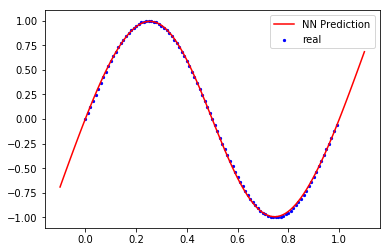

In [30]:
from sklearn.neural_network import MLPRegressor
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 1, 0.01).reshape(-1, 1)
y = np.sin(2 * np.pi * x).ravel()

nn = MLPRegressor(hidden_layer_sizes=(3), 
                  activation='tanh', 
                  solver='lbfgs')

n = nn.fit(x, y)
test_x = np.arange(-0.1, 1.1, 0.01).reshape(-1, 1)
test_y = nn.predict(test_x)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=5, c='b', marker="o", label='real')
ax1.plot(test_x,test_y, c='r', label='NN Prediction')

plt.legend()
plt.show()

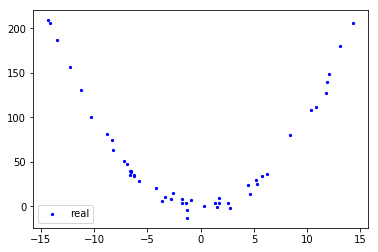

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

np.random.seed(3)
n = 50
x = np.random.uniform(-15, 15, size = n)
y = x**2 + 5*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x, y, s=5, c='b', marker="o", label='real')

plt.legend()
plt.show()

In [11]:
clf = MLPRegressor(alpha=0.1, 
                   hidden_layer_sizes = (10,), 
                   max_iter = 5000, 
                   activation = 'logistic', 
                   verbose = 'True', 
                   learning_rate = 'adaptive',
                   learning_rate_init=0.1)
a = clf.fit(X, y)

Iteration 1, loss = 3725.68573484
Iteration 2, loss = 3687.10569927
Iteration 3, loss = 3649.95146960
Iteration 4, loss = 3613.08040752
Iteration 5, loss = 3575.45975210
Iteration 6, loss = 3538.08221903
Iteration 7, loss = 3501.86280140
Iteration 8, loss = 3465.24228299
Iteration 9, loss = 3428.28916876
Iteration 10, loss = 3388.65682288
Iteration 11, loss = 3349.60820714
Iteration 12, loss = 3313.84300468
Iteration 13, loss = 3276.76983175
Iteration 14, loss = 3237.29968528
Iteration 15, loss = 3199.73420974
Iteration 16, loss = 3164.56192491
Iteration 17, loss = 3127.84071627
Iteration 18, loss = 3089.90704618
Iteration 19, loss = 3053.27873428
Iteration 20, loss = 3016.95946935
Iteration 21, loss = 2977.82373127
Iteration 22, loss = 2937.70419230
Iteration 23, loss = 2903.24479207
Iteration 24, loss = 2871.39974399
Iteration 25, loss = 2837.83784195
Iteration 26, loss = 2802.10215621
Iteration 27, loss = 2765.30753749
Iteration 28, loss = 2731.40320123
Iteration 29, loss = 2701.499

Iteration 255, loss = 929.71757716
Iteration 256, loss = 926.92144825
Iteration 257, loss = 924.13326696
Iteration 258, loss = 921.35303387
Iteration 259, loss = 918.58074938
Iteration 260, loss = 915.81641370
Iteration 261, loss = 913.06002681
Iteration 262, loss = 910.31158851
Iteration 263, loss = 907.57109838
Iteration 264, loss = 904.83855579
Iteration 265, loss = 902.11395992
Iteration 266, loss = 899.39730972
Iteration 267, loss = 896.68860394
Iteration 268, loss = 893.98784113
Iteration 269, loss = 891.29501961
Iteration 270, loss = 888.61013753
Iteration 271, loss = 885.93319282
Iteration 272, loss = 883.26418328
Iteration 273, loss = 880.60310667
Iteration 274, loss = 877.94996096
Iteration 275, loss = 875.30474549
Iteration 276, loss = 872.66746355
Iteration 277, loss = 870.03813275
Iteration 278, loss = 867.41681588
Iteration 279, loss = 864.80373188
Iteration 280, loss = 862.19962556
Iteration 281, loss = 859.60704829
Iteration 282, loss = 857.03408154
Iteration 283, loss 

Iteration 811, loss = 189.87642886
Iteration 812, loss = 189.38861442
Iteration 813, loss = 188.90231565
Iteration 814, loss = 188.41752182
Iteration 815, loss = 187.93426314
Iteration 816, loss = 187.45254146
Iteration 817, loss = 186.97234358
Iteration 818, loss = 186.49370020
Iteration 819, loss = 186.01667798
Iteration 820, loss = 185.54137891
Iteration 821, loss = 185.06801194
Iteration 822, loss = 184.59705983
Iteration 823, loss = 184.12945904
Iteration 824, loss = 183.66729774
Iteration 825, loss = 183.21435650
Iteration 826, loss = 182.77881773
Iteration 827, loss = 182.36958919
Iteration 828, loss = 181.99588199
Iteration 829, loss = 181.61541124
Iteration 830, loss = 181.16206587
Iteration 831, loss = 180.57861403
Iteration 832, loss = 179.97923239
Iteration 833, loss = 179.50185054
Iteration 834, loss = 179.13646362
Iteration 835, loss = 178.74243291
Iteration 836, loss = 178.23117553
Iteration 837, loss = 177.68837186
Iteration 838, loss = 177.24195849
Iteration 839, loss 

+ ``alpha`` is a regularization parameter. The higher this value, the higher the penalty for high network weights.
+ ``hidden_layer_sizes`` defines the network architecture. You can add hidden layers by simply lengthening this tuple. MLPRegressor deduces the dimensions of input and output layers automatically. Here, the network architecture is (1,10,1)(1,10,1).
+ ``max_iter`` defines the maximum number of learning iterations before termination. Usually, the learning terminates earlier due to the lack of improvement of the error metric.
+ ``activation`` defines the activation function. Other popular choices are 'tanh' (Tangens Hyperbolicus) and 'relu' (Rectified Linear Unit).
+ ``learning_rate``  defines the learning rate for the weight update. The higher this value, the faster the network can learn. However, learning might end up oscillating instead of converging. Setting the learning rate to 'adaptive' gradually decreases weight and usually solves this problem.

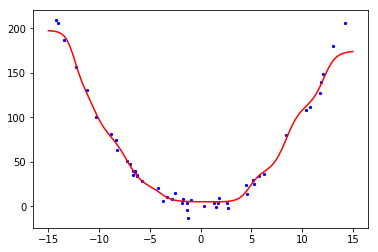

In [48]:
n = 100
x_ = np.linspace(-15, 15, n) # define axis

pred_x = np.reshape(x_, [n, 1]) # [n, ] -> [n, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.scatter(x, y, c='b', s=5, marker="o") # plot original function
plt.plot(pred_x, pred_y, 'r') # plot network output
plt.show()

`` class sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(100, ), activation=’relu’, solver=’adam’, alpha=0.0001, batch_size=’auto’, learning_rate=’constant’, learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)``

In [49]:
np.random.seed(3)
n = 25
x = np.random.uniform(-15, 15, size = n)
y = x**2 + 50*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

clf = MLPRegressor(alpha=0.00001, 
                   hidden_layer_sizes = (300,), 
                   max_iter = 100000, 
                   activation = 'logistic', 
                   verbose = 'True', 
                   nesterovs_momentum=False, 
                   learning_rate_init=0.01, 
                   tol=0.00000000001)
a = clf.fit(X, y)
x_ = np.linspace(-15, 15, 200) # define axis

pred_x = np.reshape(x_, [200, 1]) # [200, ] -> [200, 1]
pred_y = clf.predict(pred_x) # predict network output given x_

Iteration 1, loss = 4258.61392004
Iteration 2, loss = 4190.87778328
Iteration 3, loss = 4125.46192468
Iteration 4, loss = 4062.25981563
Iteration 5, loss = 4001.09980235
Iteration 6, loss = 3941.80431500
Iteration 7, loss = 3884.24726000
Iteration 8, loss = 3828.38788299
Iteration 9, loss = 3774.27863979
Iteration 10, loss = 3722.05347860
Iteration 11, loss = 3671.90826583
Iteration 12, loss = 3624.07889215
Iteration 13, loss = 3578.81831046
Iteration 14, loss = 3536.37394548
Iteration 15, loss = 3496.96774777
Iteration 16, loss = 3460.78083379
Iteration 17, loss = 3427.94307930
Iteration 18, loss = 3398.52674160
Iteration 19, loss = 3372.54313772
Iteration 20, loss = 3349.94179210
Iteration 21, loss = 3330.61165741
Iteration 22, loss = 3314.38420003
Iteration 23, loss = 3301.03835198
Iteration 24, loss = 3290.30723631
Iteration 25, loss = 3281.88638050
Iteration 26, loss = 3275.44319640
Iteration 27, loss = 3270.62766316
Iteration 28, loss = 3267.08411057
Iteration 29, loss = 3264.463

Iteration 388, loss = 1532.61074711
Iteration 389, loss = 1529.98084183
Iteration 390, loss = 1527.35221558
Iteration 391, loss = 1524.72445257
Iteration 392, loss = 1522.09721157
Iteration 393, loss = 1519.47026293
Iteration 394, loss = 1516.84353610
Iteration 395, loss = 1514.21717825
Iteration 396, loss = 1511.59162269
Iteration 397, loss = 1508.96766069
Iteration 398, loss = 1506.34650221
Iteration 399, loss = 1503.72979688
Iteration 400, loss = 1501.11956749
Iteration 401, loss = 1498.51798862
Iteration 402, loss = 1495.92694187
Iteration 403, loss = 1493.34733455
Iteration 404, loss = 1490.77832827
Iteration 405, loss = 1488.21687346
Iteration 406, loss = 1485.65808440
Iteration 407, loss = 1483.09666986
Iteration 408, loss = 1480.52884676
Iteration 409, loss = 1477.95363287
Iteration 410, loss = 1475.37281692
Iteration 411, loss = 1472.78982869
Iteration 412, loss = 1470.20827077
Iteration 413, loss = 1467.63077947
Iteration 414, loss = 1465.05850158
Iteration 415, loss = 1462.4

Iteration 880, loss = 901.65676338
Iteration 881, loss = 901.24279401
Iteration 882, loss = 900.83012763
Iteration 883, loss = 900.41875942
Iteration 884, loss = 900.00868461
Iteration 885, loss = 899.59989842
Iteration 886, loss = 899.19239609
Iteration 887, loss = 898.78617288
Iteration 888, loss = 898.38122408
Iteration 889, loss = 897.97754498
Iteration 890, loss = 897.57513089
Iteration 891, loss = 897.17397716
Iteration 892, loss = 896.77407912
Iteration 893, loss = 896.37543214
Iteration 894, loss = 895.97803161
Iteration 895, loss = 895.58187292
Iteration 896, loss = 895.18695148
Iteration 897, loss = 894.79326274
Iteration 898, loss = 894.40080213
Iteration 899, loss = 894.00956512
Iteration 900, loss = 893.61954718
Iteration 901, loss = 893.23074383
Iteration 902, loss = 892.84315056
Iteration 903, loss = 892.45676290
Iteration 904, loss = 892.07157639
Iteration 905, loss = 891.68758660
Iteration 906, loss = 891.30478908
Iteration 907, loss = 890.92317944
Iteration 908, loss 

Iteration 1148, loss = 824.80917680
Iteration 1149, loss = 824.61100403
Iteration 1150, loss = 824.41323873
Iteration 1151, loss = 824.21587858
Iteration 1152, loss = 824.01892127
Iteration 1153, loss = 823.82236454
Iteration 1154, loss = 823.62620616
Iteration 1155, loss = 823.43044395
Iteration 1156, loss = 823.23507577
Iteration 1157, loss = 823.04009955
Iteration 1158, loss = 822.84551325
Iteration 1159, loss = 822.65131489
Iteration 1160, loss = 822.45750255
Iteration 1161, loss = 822.26407436
Iteration 1162, loss = 822.07102852
Iteration 1163, loss = 821.87836329
Iteration 1164, loss = 821.68607697
Iteration 1165, loss = 821.49416794
Iteration 1166, loss = 821.30263463
Iteration 1167, loss = 821.11147552
Iteration 1168, loss = 820.92068916
Iteration 1169, loss = 820.73027415
Iteration 1170, loss = 820.54022911
Iteration 1171, loss = 820.35055275
Iteration 1172, loss = 820.16124379
Iteration 1173, loss = 819.97230098
Iteration 1174, loss = 819.78372310
Iteration 1175, loss = 819.5

Iteration 1467, loss = 773.75274516
Iteration 1468, loss = 773.61133918
Iteration 1469, loss = 773.46990039
Iteration 1470, loss = 773.32844732
Iteration 1471, loss = 773.18701143
Iteration 1472, loss = 773.04563459
Iteration 1473, loss = 772.90436457
Iteration 1474, loss = 772.76324936
Iteration 1475, loss = 772.62233111
Iteration 1476, loss = 772.48164123
Iteration 1477, loss = 772.34119749
Iteration 1478, loss = 772.20100375
Iteration 1479, loss = 772.06105193
Iteration 1480, loss = 771.92132526
Iteration 1481, loss = 771.78180196
Iteration 1482, loss = 771.64245848
Iteration 1483, loss = 771.50327188
Iteration 1484, loss = 771.36422126
Iteration 1485, loss = 771.22528846
Iteration 1486, loss = 771.08645817
Iteration 1487, loss = 770.94771772
Iteration 1488, loss = 770.80905676
Iteration 1489, loss = 770.67046680
Iteration 1490, loss = 770.53194087
Iteration 1491, loss = 770.39347310
Iteration 1492, loss = 770.25505846
Iteration 1493, loss = 770.11669245
Iteration 1494, loss = 769.9

Iteration 1708, loss = 721.90955898
Iteration 1709, loss = 721.52939869
Iteration 1710, loss = 721.15198200
Iteration 1711, loss = 720.77729775
Iteration 1712, loss = 720.40533999
Iteration 1713, loss = 720.03610592
Iteration 1714, loss = 719.66959474
Iteration 1715, loss = 719.30580681
Iteration 1716, loss = 718.94474308
Iteration 1717, loss = 718.58640451
Iteration 1718, loss = 718.23079166
Iteration 1719, loss = 717.87790438
Iteration 1720, loss = 717.52774160
Iteration 1721, loss = 717.18030139
Iteration 1722, loss = 716.83558096
Iteration 1723, loss = 716.49357687
Iteration 1724, loss = 716.15428515
Iteration 1725, loss = 715.81770142
Iteration 1726, loss = 715.48382101
Iteration 1727, loss = 715.15263889
Iteration 1728, loss = 714.82414964
Iteration 1729, loss = 714.49834726
Iteration 1730, loss = 714.17522489
Iteration 1731, loss = 713.85477450
Iteration 1732, loss = 713.53698637
Iteration 1733, loss = 713.22184867
Iteration 1734, loss = 712.90934682
Iteration 1735, loss = 712.5

Iteration 2043, loss = 664.06677827
Iteration 2044, loss = 663.96576586
Iteration 2045, loss = 663.86492797
Iteration 2046, loss = 663.76426493
Iteration 2047, loss = 663.66377764
Iteration 2048, loss = 663.56346722
Iteration 2049, loss = 663.46333462
Iteration 2050, loss = 663.36338037
Iteration 2051, loss = 663.26360445
Iteration 2052, loss = 663.16400625
Iteration 2053, loss = 663.06458469
Iteration 2054, loss = 662.96533837
Iteration 2055, loss = 662.86626582
Iteration 2056, loss = 662.76736564
Iteration 2057, loss = 662.66863666
Iteration 2058, loss = 662.57007802
Iteration 2059, loss = 662.47168916
Iteration 2060, loss = 662.37346974
Iteration 2061, loss = 662.27541956
Iteration 2062, loss = 662.17753844
Iteration 2063, loss = 662.07982612
Iteration 2064, loss = 661.98228221
Iteration 2065, loss = 661.88490616
Iteration 2066, loss = 661.78769726
Iteration 2067, loss = 661.69065470
Iteration 2068, loss = 661.59377760
Iteration 2069, loss = 661.49706507
Iteration 2070, loss = 661.4

Iteration 2400, loss = 635.20463335
Iteration 2401, loss = 635.13341208
Iteration 2402, loss = 635.06217787
Iteration 2403, loss = 634.99092998
Iteration 2404, loss = 634.91966768
Iteration 2405, loss = 634.84839023
Iteration 2406, loss = 634.77709689
Iteration 2407, loss = 634.70578693
Iteration 2408, loss = 634.63445958
Iteration 2409, loss = 634.56311411
Iteration 2410, loss = 634.49174976
Iteration 2411, loss = 634.42036577
Iteration 2412, loss = 634.34896139
Iteration 2413, loss = 634.27753585
Iteration 2414, loss = 634.20608839
Iteration 2415, loss = 634.13461824
Iteration 2416, loss = 634.06312462
Iteration 2417, loss = 633.99160677
Iteration 2418, loss = 633.92006390
Iteration 2419, loss = 633.84849523
Iteration 2420, loss = 633.77689998
Iteration 2421, loss = 633.70527737
Iteration 2422, loss = 633.63362659
Iteration 2423, loss = 633.56194685
Iteration 2424, loss = 633.49023736
Iteration 2425, loss = 633.41849732
Iteration 2426, loss = 633.34672591
Iteration 2427, loss = 633.2

Iteration 2671, loss = 612.44824123
Iteration 2672, loss = 612.33984339
Iteration 2673, loss = 612.23119889
Iteration 2674, loss = 612.12230719
Iteration 2675, loss = 612.01316773
Iteration 2676, loss = 611.90377991
Iteration 2677, loss = 611.79414307
Iteration 2678, loss = 611.68425654
Iteration 2679, loss = 611.57411962
Iteration 2680, loss = 611.46373159
Iteration 2681, loss = 611.35309182
Iteration 2682, loss = 611.24219990
Iteration 2683, loss = 611.13105597
Iteration 2684, loss = 611.01966156
Iteration 2685, loss = 610.90802108
Iteration 2686, loss = 610.79614599
Iteration 2687, loss = 610.68406169
Iteration 2688, loss = 610.57182791
Iteration 2689, loss = 610.45956530
Iteration 2690, loss = 610.34754846
Iteration 2691, loss = 610.23621106
Iteration 2692, loss = 610.12636208
Iteration 2693, loss = 610.01775982
Iteration 2694, loss = 609.90872203
Iteration 2695, loss = 609.79202660
Iteration 2696, loss = 609.66846114
Iteration 2697, loss = 609.54754417
Iteration 2698, loss = 609.4

Iteration 2979, loss = 570.59434807
Iteration 2980, loss = 570.44515640
Iteration 2981, loss = 570.29575504
Iteration 2982, loss = 570.14618139
Iteration 2983, loss = 569.99650510
Iteration 2984, loss = 569.84683307
Iteration 2985, loss = 569.69730746
Iteration 2986, loss = 569.54809237
Iteration 2987, loss = 569.39934621
Iteration 2988, loss = 569.25118307
Iteration 2989, loss = 569.10363418
Iteration 2990, loss = 568.95662639
Iteration 2991, loss = 568.80999169
Iteration 2992, loss = 568.66350822
Iteration 2993, loss = 568.51695799
Iteration 2994, loss = 568.37017954
Iteration 2995, loss = 568.22309896
Iteration 2996, loss = 568.07573424
Iteration 2997, loss = 567.92817681
Iteration 2998, loss = 567.78055901
Iteration 2999, loss = 567.63301766
Iteration 3000, loss = 567.48566325
Iteration 3001, loss = 567.33856149
Iteration 3002, loss = 567.19172964
Iteration 3003, loss = 567.04514495
Iteration 3004, loss = 566.89875954
Iteration 3005, loss = 566.75251605
Iteration 3006, loss = 566.6

Iteration 3329, loss = 522.63009851
Iteration 3330, loss = 522.50371364
Iteration 3331, loss = 522.37692728
Iteration 3332, loss = 522.25010511
Iteration 3333, loss = 522.12350647
Iteration 3334, loss = 521.99710616
Iteration 3335, loss = 521.87091669
Iteration 3336, loss = 521.74503708
Iteration 3337, loss = 521.61942741
Iteration 3338, loss = 521.49389883
Iteration 3339, loss = 521.36831820
Iteration 3340, loss = 521.24268241
Iteration 3341, loss = 521.11695893
Iteration 3342, loss = 520.99105374
Iteration 3343, loss = 520.86494810
Iteration 3344, loss = 520.73871377
Iteration 3345, loss = 520.61240722
Iteration 3346, loss = 520.48603595
Iteration 3347, loss = 520.35963240
Iteration 3348, loss = 520.23326923
Iteration 3349, loss = 520.10698626
Iteration 3350, loss = 519.98076829
Iteration 3351, loss = 519.85459527
Iteration 3352, loss = 519.72847052
Iteration 3353, loss = 519.60238941
Iteration 3354, loss = 519.47632698
Iteration 3355, loss = 519.35027610
Iteration 3356, loss = 519.2

Iteration 3670, loss = 482.61762806
Iteration 3671, loss = 482.50401647
Iteration 3672, loss = 482.39013041
Iteration 3673, loss = 482.27704402
Iteration 3674, loss = 482.16423761
Iteration 3675, loss = 482.05075991
Iteration 3676, loss = 481.93688292
Iteration 3677, loss = 481.82348526
Iteration 3678, loss = 481.71042985
Iteration 3679, loss = 481.59700809
Iteration 3680, loss = 481.48326662
Iteration 3681, loss = 481.36976254
Iteration 3682, loss = 481.25657789
Iteration 3683, loss = 481.14329267
Iteration 3684, loss = 481.02976896
Iteration 3685, loss = 480.91635202
Iteration 3686, loss = 480.80322132
Iteration 3687, loss = 480.69013912
Iteration 3688, loss = 480.57694311
Iteration 3689, loss = 480.46379431
Iteration 3690, loss = 480.35086870
Iteration 3691, loss = 480.23809426
Iteration 3692, loss = 480.12531056
Iteration 3693, loss = 480.01255759
Iteration 3694, loss = 479.89998436
Iteration 3695, loss = 479.78758885
Iteration 3696, loss = 479.67526886
Iteration 3697, loss = 479.5

Iteration 4010, loss = 441.46029586
Iteration 4011, loss = 441.30602318
Iteration 4012, loss = 441.15192584
Iteration 4013, loss = 440.99799113
Iteration 4014, loss = 440.84420560
Iteration 4015, loss = 440.69055564
Iteration 4016, loss = 440.53702782
Iteration 4017, loss = 440.38360901
Iteration 4018, loss = 440.23028639
Iteration 4019, loss = 440.07704747
Iteration 4020, loss = 439.92388012
Iteration 4021, loss = 439.77077265
Iteration 4022, loss = 439.61771385
Iteration 4023, loss = 439.46469311
Iteration 4024, loss = 439.31170037
Iteration 4025, loss = 439.15872623
Iteration 4026, loss = 439.00576180
Iteration 4027, loss = 438.85279886
Iteration 4028, loss = 438.69982977
Iteration 4029, loss = 438.54684757
Iteration 4030, loss = 438.39384596
Iteration 4031, loss = 438.24081934
Iteration 4032, loss = 438.08776276
Iteration 4033, loss = 437.93467198
Iteration 4034, loss = 437.78154329
Iteration 4035, loss = 437.62837364
Iteration 4036, loss = 437.47516036
Iteration 4037, loss = 437.3

Iteration 4349, loss = 385.56203413
Iteration 4350, loss = 385.39093537
Iteration 4351, loss = 385.22010555
Iteration 4352, loss = 385.04953206
Iteration 4353, loss = 384.87918947
Iteration 4354, loss = 384.70905359
Iteration 4355, loss = 384.53911396
Iteration 4356, loss = 384.36937268
Iteration 4357, loss = 384.19984339
Iteration 4358, loss = 384.03054087
Iteration 4359, loss = 383.86147680
Iteration 4360, loss = 383.69265538
Iteration 4361, loss = 383.52407442
Iteration 4362, loss = 383.35572796
Iteration 4363, loss = 383.18760912
Iteration 4364, loss = 383.01971372
Iteration 4365, loss = 382.85203996
Iteration 4366, loss = 382.68458985
Iteration 4367, loss = 382.51736649
Iteration 4368, loss = 382.35037418
Iteration 4369, loss = 382.18361613
Iteration 4370, loss = 382.01709465
Iteration 4371, loss = 381.85081050
Iteration 4372, loss = 381.68476338
Iteration 4373, loss = 381.51895240
Iteration 4374, loss = 381.35337633
Iteration 4375, loss = 381.18803440
Iteration 4376, loss = 381.0

Iteration 4668, loss = 341.94242560
Iteration 4669, loss = 341.83634385
Iteration 4670, loss = 341.73047935
Iteration 4671, loss = 341.62483253
Iteration 4672, loss = 341.51940325
Iteration 4673, loss = 341.41419080
Iteration 4674, loss = 341.30919385
Iteration 4675, loss = 341.20441058
Iteration 4676, loss = 341.09983870
Iteration 4677, loss = 340.99547560
Iteration 4678, loss = 340.89131840
Iteration 4679, loss = 340.78736416
Iteration 4680, loss = 340.68360989
Iteration 4681, loss = 340.58005272
Iteration 4682, loss = 340.47668995
Iteration 4683, loss = 340.37351910
Iteration 4684, loss = 340.27053792
Iteration 4685, loss = 340.16774442
Iteration 4686, loss = 340.06513686
Iteration 4687, loss = 339.96271367
Iteration 4688, loss = 339.86047348
Iteration 4689, loss = 339.75841505
Iteration 4690, loss = 339.65653723
Iteration 4691, loss = 339.55483892
Iteration 4692, loss = 339.45331906
Iteration 4693, loss = 339.35197661
Iteration 4694, loss = 339.25081050
Iteration 4695, loss = 339.1

Iteration 4988, loss = 315.00200560
Iteration 4989, loss = 314.93420573
Iteration 4990, loss = 314.86659885
Iteration 4991, loss = 314.79913408
Iteration 4992, loss = 314.73170051
Iteration 4993, loss = 314.66426881
Iteration 4994, loss = 314.59690815
Iteration 4995, loss = 314.52968413
Iteration 4996, loss = 314.46257944
Iteration 4997, loss = 314.39553147
Iteration 4998, loss = 314.32851492
Iteration 4999, loss = 314.26156279
Iteration 5000, loss = 314.19471801
Iteration 5001, loss = 314.12798366
Iteration 5002, loss = 314.06132733
Iteration 5003, loss = 313.99472511
Iteration 5004, loss = 313.92818691
Iteration 5005, loss = 313.86173794
Iteration 5006, loss = 313.79538803
Iteration 5007, loss = 313.72912406
Iteration 5008, loss = 313.66292770
Iteration 5009, loss = 313.59679545
Iteration 5010, loss = 313.53073890
Iteration 5011, loss = 313.46476863
Iteration 5012, loss = 313.39888282
Iteration 5013, loss = 313.33307132
Iteration 5014, loss = 313.26732707
Iteration 5015, loss = 313.2

Iteration 5285, loss = 297.86022592
Iteration 5286, loss = 297.81072062
Iteration 5287, loss = 297.76124595
Iteration 5288, loss = 297.71180103
Iteration 5289, loss = 297.66238496
Iteration 5290, loss = 297.61299686
Iteration 5291, loss = 297.56363593
Iteration 5292, loss = 297.51430151
Iteration 5293, loss = 297.46499301
Iteration 5294, loss = 297.41570985
Iteration 5295, loss = 297.36645148
Iteration 5296, loss = 297.31721735
Iteration 5297, loss = 297.26800701
Iteration 5298, loss = 297.21882009
Iteration 5299, loss = 297.16965635
Iteration 5300, loss = 297.12051564
Iteration 5301, loss = 297.07139788
Iteration 5302, loss = 297.02230307
Iteration 5303, loss = 296.97323121
Iteration 5304, loss = 296.92418239
Iteration 5305, loss = 296.87515666
Iteration 5306, loss = 296.82615409
Iteration 5307, loss = 296.77717467
Iteration 5308, loss = 296.72821831
Iteration 5309, loss = 296.67928484
Iteration 5310, loss = 296.63037397
Iteration 5311, loss = 296.58148528
Iteration 5312, loss = 296.5

Iteration 5649, loss = 274.93196353
Iteration 5650, loss = 274.85582172
Iteration 5651, loss = 274.77134301
Iteration 5652, loss = 274.67630806
Iteration 5653, loss = 274.58391853
Iteration 5654, loss = 274.50185821
Iteration 5655, loss = 274.42113812
Iteration 5656, loss = 274.33226017
Iteration 5657, loss = 274.23999068
Iteration 5658, loss = 274.15309173
Iteration 5659, loss = 274.07057160
Iteration 5660, loss = 273.98577412
Iteration 5661, loss = 273.89649467
Iteration 5662, loss = 273.80730434
Iteration 5663, loss = 273.72221544
Iteration 5664, loss = 273.63837953
Iteration 5665, loss = 273.55158691
Iteration 5666, loss = 273.46298946
Iteration 5667, loss = 273.37596812
Iteration 5668, loss = 273.29096950
Iteration 5669, loss = 273.20569300
Iteration 5670, loss = 273.11856905
Iteration 5671, loss = 273.03093603
Iteration 5672, loss = 272.94473863
Iteration 5673, loss = 272.85948863
Iteration 5674, loss = 272.77349182
Iteration 5675, loss = 272.68653204
Iteration 5676, loss = 272.5

Iteration 5916, loss = 253.24248083
Iteration 5917, loss = 253.15439755
Iteration 5918, loss = 253.05871537
Iteration 5919, loss = 252.96910808
Iteration 5920, loss = 252.89448651
Iteration 5921, loss = 252.83111107
Iteration 5922, loss = 252.76706131
Iteration 5923, loss = 252.69332491
Iteration 5924, loss = 252.61039967
Iteration 5925, loss = 252.52601281
Iteration 5926, loss = 252.44870753
Iteration 5927, loss = 252.37937037
Iteration 5928, loss = 252.31109391
Iteration 5929, loss = 252.23735005
Iteration 5930, loss = 252.15775059
Iteration 5931, loss = 252.07720458
Iteration 5932, loss = 252.00082101
Iteration 5933, loss = 251.92955773
Iteration 5934, loss = 251.85967143
Iteration 5935, loss = 251.78698304
Iteration 5936, loss = 251.71086448
Iteration 5937, loss = 251.63363772
Iteration 5938, loss = 251.55804038
Iteration 5939, loss = 251.48505702
Iteration 5940, loss = 251.41332741
Iteration 5941, loss = 251.34069876
Iteration 5942, loss = 251.26637302
Iteration 5943, loss = 251.1

Iteration 6583, loss = 211.30451353
Iteration 6584, loss = 211.25300691
Iteration 6585, loss = 211.20166474
Iteration 6586, loss = 211.15033604
Iteration 6587, loss = 211.09891260
Iteration 6588, loss = 211.04738852
Iteration 6589, loss = 210.99583401
Iteration 6590, loss = 210.94433805
Iteration 6591, loss = 210.89295913
Iteration 6592, loss = 210.84169919
Iteration 6593, loss = 210.79051294
Iteration 6594, loss = 210.73934612
Iteration 6595, loss = 210.68816635
Iteration 6596, loss = 210.63697043
Iteration 6597, loss = 210.58578097
Iteration 6598, loss = 210.53463208
Iteration 6599, loss = 210.48355091
Iteration 6600, loss = 210.43254706
Iteration 6601, loss = 210.38161512
Iteration 6602, loss = 210.33074137
Iteration 6603, loss = 210.27990813
Iteration 6604, loss = 210.22910168
Iteration 6605, loss = 210.17831151
Iteration 6606, loss = 210.12752856
Iteration 6607, loss = 210.07673851
Iteration 6608, loss = 210.02592520
Iteration 6609, loss = 209.97507110
Iteration 6610, loss = 209.9

Iteration 7052, loss = 174.70515680
Iteration 7053, loss = 174.60737585
Iteration 7054, loss = 174.50980718
Iteration 7055, loss = 174.41248526
Iteration 7056, loss = 174.31544387
Iteration 7057, loss = 174.21871672
Iteration 7058, loss = 174.12233576
Iteration 7059, loss = 174.02632831
Iteration 7060, loss = 173.93071183
Iteration 7061, loss = 173.83548205
Iteration 7062, loss = 173.74060253
Iteration 7063, loss = 173.64599002
Iteration 7064, loss = 173.55152870
Iteration 7065, loss = 173.45710656
Iteration 7066, loss = 173.36269722
Iteration 7067, loss = 173.26840521
Iteration 7068, loss = 173.17444118
Iteration 7069, loss = 173.08100003
Iteration 7070, loss = 172.98815206
Iteration 7071, loss = 172.89581306
Iteration 7072, loss = 172.80380408
Iteration 7073, loss = 172.71193419
Iteration 7074, loss = 172.62007587
Iteration 7075, loss = 172.52820443
Iteration 7076, loss = 172.43639604
Iteration 7077, loss = 172.34477378
Iteration 7078, loss = 172.25343418
Iteration 7079, loss = 172.1

Iteration 7367, loss = 152.01583122
Iteration 7368, loss = 151.99374647
Iteration 7369, loss = 151.96371648
Iteration 7370, loss = 151.89890552
Iteration 7371, loss = 151.82303628
Iteration 7372, loss = 151.76924072
Iteration 7373, loss = 151.73769454
Iteration 7374, loss = 151.70082984
Iteration 7375, loss = 151.64244520
Iteration 7376, loss = 151.57798214
Iteration 7377, loss = 151.52796070
Iteration 7378, loss = 151.49112338
Iteration 7379, loss = 151.44986503
Iteration 7380, loss = 151.39555706
Iteration 7381, loss = 151.33849537
Iteration 7382, loss = 151.29055427
Iteration 7383, loss = 151.25023327
Iteration 7384, loss = 151.20700178
Iteration 7385, loss = 151.15600992
Iteration 7386, loss = 151.10350859
Iteration 7387, loss = 151.05651539
Iteration 7388, loss = 151.01413315
Iteration 7389, loss = 150.97025361
Iteration 7390, loss = 150.92189271
Iteration 7391, loss = 150.87232799
Iteration 7392, loss = 150.82579921
Iteration 7393, loss = 150.78229792
Iteration 7394, loss = 150.7

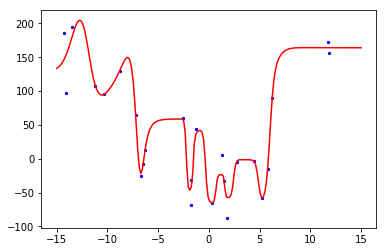

In [50]:
fig = plt.figure() 
plt.scatter(x, y, c='b', s=5, marker="o") # plot original function
plt.plot(pred_x, pred_y, 'r') # plot network output
plt.show()